Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


## Collaborators
* Collaborator 1:
* Collaborator 2: Damari Alicia Paredes García
* Collaborator 3:

# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font>

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [3]:
#!pip install nbimporter

In [4]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks.
import nbimporter
import pandas as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import matplotlib              as mpl
import seaborn                 as sns

# This statement allow to display plots without asking to
%matplotlib inline

# you can also add the following line for making pretty-loking plots
plt.style.use('ggplot')


In [5]:
# Here is an example of invoking the Fibonacci function, whisch should be located in the same directory as the main:
from fibbo_func import fibbonaci as fibbo
fibbo(24)

46368

We import the functions from the notebooks of all the collaborators.

In [18]:
# Functions of collaborator 1


# Functions of collaborator 2
from Collaborator_2 import scat_plt as scat_plt
from Collaborator_2 import normalize as normalize

# Functions of collaborator 3


## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work.
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [6]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data',
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 1. Cleaning and tidying the dataset

First of all, we rename the variables of the given dataframe using the function *renamevars(df,dict_names)* to use simple names for the rest of the analysis.

In [ ]:
# your code here


Also, we create two new columns using the variable _name_, one for subject id and the other for the number of trial.

In [7]:
split_name = df.name.str.split('_',expand=True) # separate the string into segments using the character '_' as separator
# It would create one column for each segment

print('spliting the values in "name" yields the following data frame. The first two columns are useless')
print(split_name.head()) # note that the first two columns are not relevant for our analisys so we can drop them
split_name.drop(split_name.columns[[0, 1]], axis =1, inplace = True) # drop the first two columns and modify the dataframe
split_name.columns = ['subject_id', 'trial'] # addnames to the respective columns for facilitating interpretation
split_name

spliting the values in "name" yields the following data frame. The first two columns are useless
      0    1    2  3
0  phon  R01  S01  1
1  phon  R01  S01  2
2  phon  R01  S01  3
3  phon  R01  S01  4
4  phon  R01  S01  5


,subject_id,trial
0,S01,1
1,S01,2
2,S01,3
3,S01,4
4,S01,5
...,...,...
190,S50,2
191,S50,3
192,S50,4
193,S50,5


We add the new two columns to the dataframe and also remove the orginal _name_. In addition we place the two new columns in the first positions in the dataframe.

In [16]:
# add new columns
df = df.assign(Subject_id=split_name['subject_id'],
               Trial=split_name['trial'])
# change position of columns
column_to_move = df.pop("Subject_id")
# insert column with insert(location, column_name, column_value)
df.insert(0, "Subject_id", column_to_move)
column_to_move = df.pop("Trial")
# insert column with insert(location, column_name, column_value)
df.insert(1, "Trial", column_to_move)
df = df.drop(columns=["name"])
df.head(5)

The main objective is to obtain a cleaner dataframe, to do that we will try to identify the correlated variables. We will apply the _scat_plt()_ function to observe their behavior.

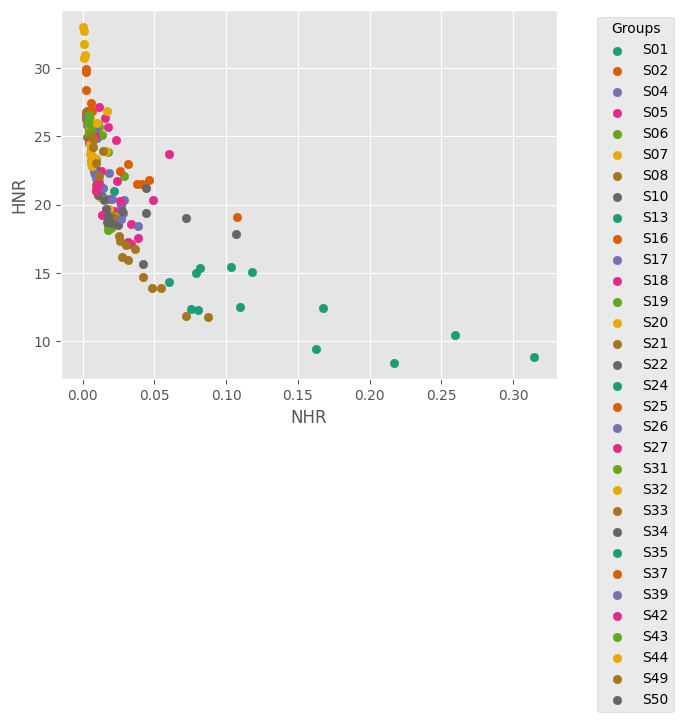

In [25]:
scat_plt(df['NHR'], df['HNR'], df['Subject_id']) # exemple to see if works, remove for final deliver

### 2. Basic EDA based on plots and descriptive statistics

In this section we will make some EDA (Exploratory Data Analysis) of the cleaner dataframe. We will plot variables and make descriptive statistics.

In [ ]:
# your code here

### 3. Aggregating and transforming variables in the dataset

In [ ]:
# your code here

### 4. Differentiating between controls (healthy subjects) and patients

In [ ]:
# your code here